# ÏÇ¨ÏßÑ Ï§ÄÎπÑÌïòÍ∏∞

1. ÏñºÍµ¥Ïù¥ Ìè¨Ìï®Îêú ÏÇ¨ÏßÑÏùÑ Ï§ÄÎπÑÌïòÍ≥†
2. ÏÇ¨ÏßÑÏúºÎ°úÎ∂ÄÌÑ∞ ÏñºÍµ¥ ÏòÅÏó≠ face landmark Î•º Ï∞æÏïÑÎÉÖÎãàÎã§. (landmarkÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÏñºÍµ¥Ïùò bounding boxÎ•º Î®ºÏ†Ä Ï∞æÏïÑÏïºÌï©ÎãàÎã§.)
3. Ï∞æÏïÑÏßÑ ÏòÅÏó≠ÏúºÎ°ú Î∂ÄÌÑ∞ Î®∏Î¶¨Ïóê ÏôïÍ¥Ä Ïä§Ìã∞Ïª§Î•º Î∂ôÏó¨ÎÑ£Í≤†ÏäµÎãàÎã§.

In [ ]:
# !pip install opencv-python
# !pip install cmake
# !pip install dlib # dlib Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

In [ ]:
img_bgr = cv2.imread('./data/img/Itzy.png')
img_bgr = cv2.resize(img_bgr, (640, 320))
img_show = img_bgr.copy() # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥µÏÇ¨

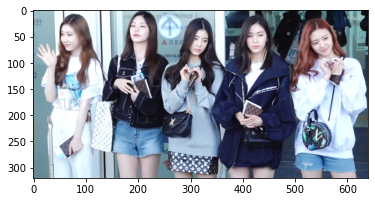

In [21]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

 cv2.imread('img.png', 0) ÏóêÏÑú 0ÏùÄ Ïù¥ÎØ∏ÏßÄÎ•º GrayscaleÎ°ú ÏùΩÏñ¥ Îì§ÏûÖÎãàÎã§.

# ÏñºÍµ¥ Í≤ÄÏ∂ú face detection

dlib Ïùò face detectorÎäî HOG(Histogram of Oriented Gradient) featureÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú  
SVM(Support Vector Machine)Ïùò sliding windowÎ°ú ÏñºÍµ¥ÏùÑ Ï∞æÏäµÎãàÎã§.

In [22]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector ÏÑ†Ïñ∏
print("üå´üõ∏")

üå´üõ∏


In [23]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)
print("üå´üõ∏")

rectangles[[(40, 31) (84, 74)], [(405, 36) (448, 79)], [(530, 46) (573, 89)], [(297, 46) (333, 82)], [(181, 22) (217, 58)]]
üå´üõ∏


rectangles[[(40, 31) (84, 74)], [(405, 36) (448, 79)], [(530, 46) (573, 89)], [(297, 46) (333, 82)], [(181, 22) (217, 58)]]


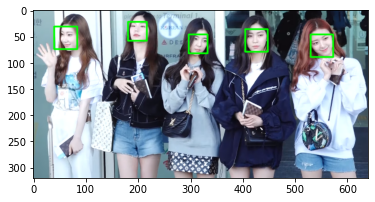

In [24]:
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨ face landmark

In [ ]:
# $ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# $ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
# $ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [41]:
import os
model_path = './data/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("üå´üõ∏")

üå´üõ∏


In [50]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ï∞æÏïÑÏßÑ ÏñºÍµ¥ Í∞úÏàòÎßàÎã§ Î∞òÎ≥µÌïòÎ©¥ list_landmarkÏóê 68Í∞úÏùò ÎûúÎìúÎßàÌÅ¨Í∞Ä ÏñºÍµ¥ Í∞úÏàòÎßåÌÅº Ï†ÄÏû•Îê©ÎãàÎã§.

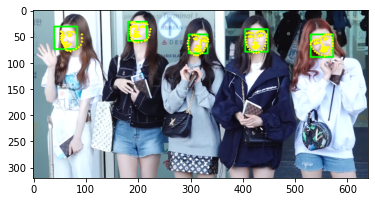

In [52]:
for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞

In [55]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x,y): (%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(55, 58)
(x,y): (55,36)
(w,h):(45,45)
(424, 60)
(x,y): (424,38)
(w,h):(44,44)
(554, 70)
(x,y): (554,48)
(w,h):(44,44)
(318, 67)
(x,y): (318,49)
(w,h):(37,37)
(196, 36)
(x,y): (196,18)
(w,h):(37,37)


Í∞Å ÏñºÍµ¥Ïùò Ï¢åÌëúÎ•º ÌôïÏù∏Ìï¥ Î≥¥ÏïòÏäµÎãàÎã§.  
Ï¥ù 5Í∞úÏùò Ï¢åÌëúÍ∞Ä ÎÇòÏò§Í≤å Îê©ÎãàÎã§.  
Ïó¨Í∏∞ÏÑú y-w//2Î•º Ìï¥Ï£ºÎäî Ïù¥Ïú†Îäî Í∑∏ Ï¢åÌëúÏóê Î™®ÏûêÎ•º ÏîåÏö∏ Í≤É Ïù¥Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. 

In [71]:
import os 
sticker_path = './data/img/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

(37, 37, 3)


Ï§ÄÎπÑÌï¥ Îëî Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥ÏÑú Ï†ÅÏö©Ìï¥ Î≥¥ÏïòÏäµÎãàÎã§.

In [72]:
refined_x = x-w//2
refined_y = y-h
print('(x,y):(%d, %d)'%(refined_x, refined_y))

(x,y):(178, -19)


Ïù¥Ï†ú Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö© ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ÏÑú x-w//2Î•º Ìï¥Ï£ºÎÑ§Ïöî.  
ÏâΩÍ≤å ÎßêÌï¥ÏÑú Ï¢åÌëúÎ•º Ï¢åÏ∏°, ÏÉÅÎã® Íº≠ÏßÄÏ†êÏóê ÎëêÎäî Í≤É ÏûÖÎãàÎã§.  
Í∑∏Îü∞Îç∞ Ïó¨Í∏∞ÏÑú Ïôú ÏùåÏàòÍ∞Ä ÎÇòÏôîÏùÑÍπåÏöî?  
Î∞îÎ°ú ÏÇ¨ÏßÑÏùò ÌÅ¨Í∏∞Î•º Î≤óÏñ¥ÎÇ¨Í∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§.  
Í∑∏ÎûòÏÑú ÏÇ¨ÏßÑ Í∑úÍ≤©Ïóê ÎßûÏ∂∞ Ïä§Ìã∞Ïª§Ïùò ÏúóÎ∂ÄÎ∂ÑÏùÑ ÏûòÎùºÎÇ¥Ïïº Îê©ÎãàÎã§. 

In [73]:
print('ÏûêÎ•¥Í∏∞ Ï†Ñ: ', img_sticker.shape)
img_sticker = img_sticker[-refined_y:]
print('ÏûêÎ•∏ ÌõÑ: ',img_sticker.shape)

ÏûêÎ•¥Í∏∞ Ï†Ñ:  (37, 37, 3)
ÏûêÎ•∏ ÌõÑ:  (18, 37, 3)


Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄÏùò yÏ∂ï(Ìñâ)Ïù¥ ÏûòÎ¶∞ Î™®ÏäµÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏäµÎãàÎã§. 

In [75]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (178,0)


Ïù¥Ï†ú Ïä§Ìã∞Ïª§Î•º ÏûòÎûêÏúºÎãàÍπå ÏùåÏàòÎ°úÎêú y Ï¢åÌëúÎ•º 0ÏúºÎ°ú Î∞îÍøîÏ§çÏãúÎã§.

In [78]:
x_shape = img_sticker.shape[0]
y_shape = img_sticker.shape[1]
print('(x_shape,y_shape) : (%d,%d)'%(x_shape, y_shape))

sticker_area = img_show[refined_y:x_shape, refined_x:refined_x+y_shape]
img_show[refined_y:x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==0, sticker_area, img_sticker).astype(np.uint8)

(x_shape,y_shape) : (18,37)


ÏúÑÏùò ÏΩîÎìúÎäî ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Ïä§Ìã∞Ïª§Î•º Ï†ÅÏö©ÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§.  
Î®ºÏ†Ä sticker_areaÎ°ú Ïä§Ìã∞Ïª§Í∞Ä Ï∞®ÏßÄÌïòÎäî ÏòÅÏó≠ÏùÑ ÏßÄÏ†ïÌï¥ Ï§çÎãàÎã§.  
Ïó¨Í∏∞ÏÑúÎäî yÍ∞Ä 0Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê refined_y:x_shapeÏùÑ Ìïú Í≤É Í∞ôÎÑ§Ïöî.

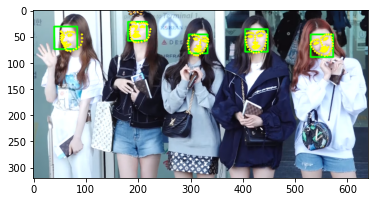

In [79]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

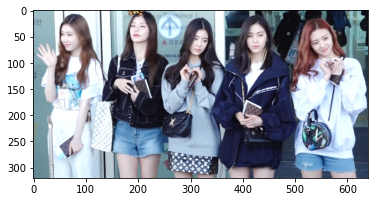

In [81]:
sticker_area = img_bgr[refined_y:x_shape, refined_x:refined_x+y_shape]
img_bgr[refined_y:x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(2, cv2.COLOR_BGR2RGB))
plt.show()